# Store Sales Prediction

## Aim: ML model to predict the sales of the different stores of Big Mart according to the provided dataset.

## Description: 
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.


### Features overview:
- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [205]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
data_frame=pd.read_csv('Train.csv')

In [208]:
data_frame.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [209]:
data_frame.shape

(8523, 12)

In [210]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [211]:
data_frame.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [264]:
#Checking out the data-types for every column
for cols in data_frame.columns:
    print('{}: {}'.format(cols,data_frame[cols].dtype))

Item_Identifier: object
Item_Weight: float64
Item_Fat_Content: object
Item_Visibility: float64
Item_Type: object
Item_MRP: float64
Outlet_Identifier: object
Outlet_Establishment_Year: int64
Outlet_Size: object
Outlet_Location_Type: object
Outlet_Type: object
Item_Outlet_Sales: float64


In [212]:
for cols in data_frame.columns:
    print('{} has {} unique values'.format(cols,len(data_frame[cols].unique())))

Item_Identifier has 1559 unique values
Item_Weight has 416 unique values
Item_Fat_Content has 5 unique values
Item_Visibility has 7880 unique values
Item_Type has 16 unique values
Item_MRP has 5938 unique values
Outlet_Identifier has 10 unique values
Outlet_Establishment_Year has 9 unique values
Outlet_Size has 4 unique values
Outlet_Location_Type has 3 unique values
Outlet_Type has 4 unique values
Item_Outlet_Sales has 3493 unique values


### Missing values

In [214]:
data_frame.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [215]:
#Only Item_Weight and Outlet_Establishment_Year has null values

In [216]:
null_features=[]
null_percentage=[]
null_count=[]
for cols in data_frame.columns:
    if data_frame[cols].isnull().sum()>0:
        null_features.append(cols)
        percentage=data_frame[cols].isnull().sum()/len(data_frame)
        null_percentage.append(percentage)
        null_count.append(data_frame[cols].isnull().sum())
pd.DataFrame({'Count':null_count,'Percentage':null_percentage},index=null_features)

,Count,Percentage
Item_Weight,1463,0.171653
Outlet_Size,2410,0.282764


In [217]:
#Checking out the deplicated records
duplicate=data_frame.duplicated()
print(duplicate.sum())

0


### Finding out the outliers

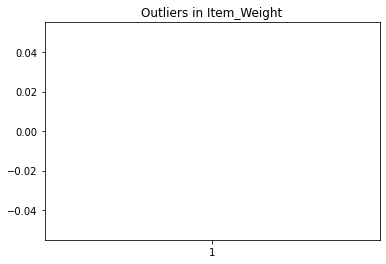

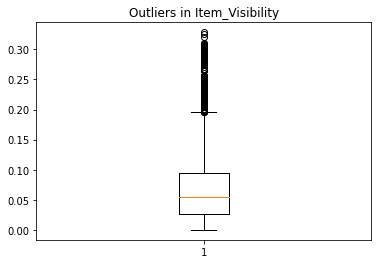

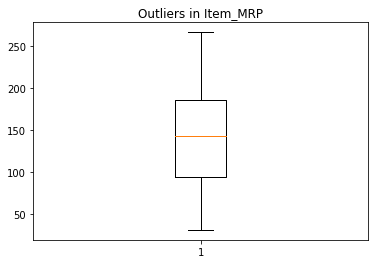

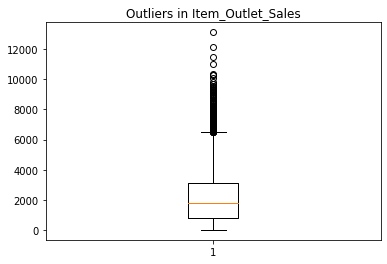

In [218]:
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        if len(data_frame[cols].unique())>25:
            plt.title('Outliers in '+cols)
            plt.boxplot(data_frame[cols])
            plt.show()

There are outliers in Item_Visibility and Item_Outlet_Sales

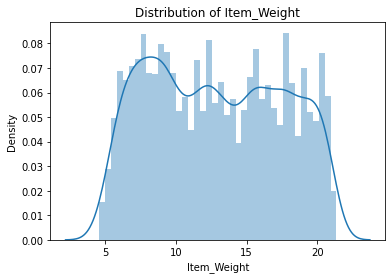

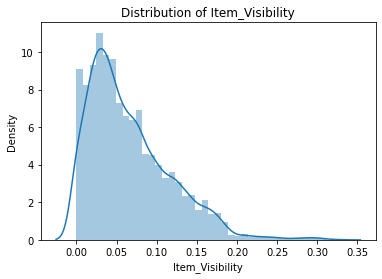

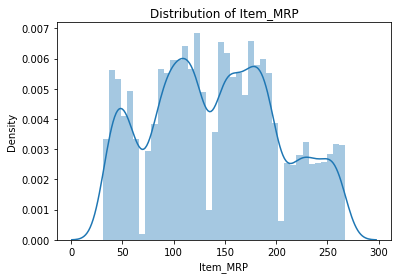

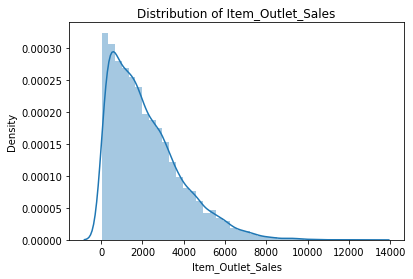

In [219]:
#Checking the distribution
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        if len(data_frame[cols].unique())>25:
            plt.title('Distribution of '+cols)
            sns.distplot(data_frame[cols],bins=40)
            plt.show()

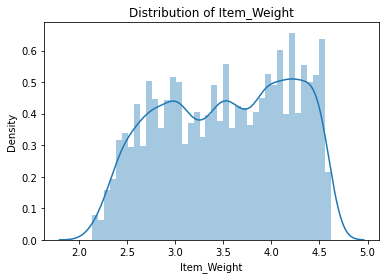

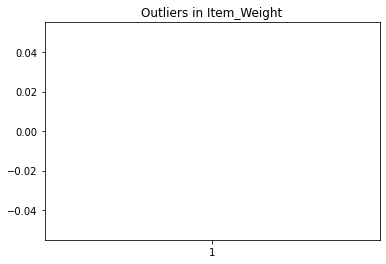

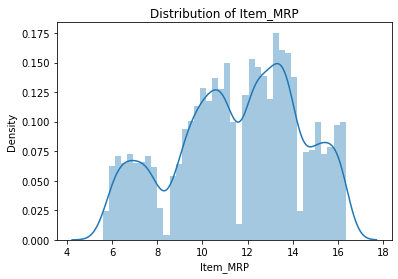

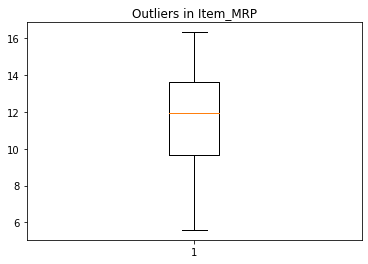

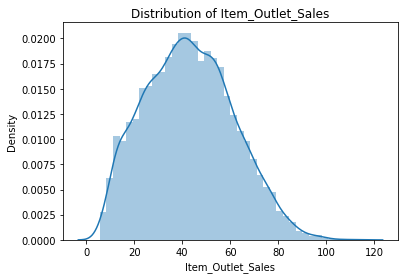

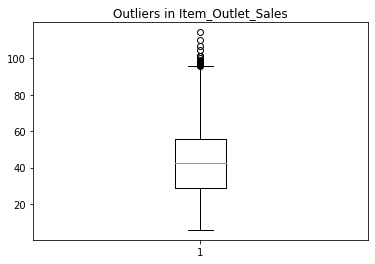

In [220]:
#Plotting out the distribution after transforming the values
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        if len(data_frame[cols].unique())>25:
            if 0 not in data_frame[cols].unique():
                temp=np.sqrt(data_frame[cols])
                plt.title('Distribution of '+cols)
                sns.distplot(temp,bins=40)
                plt.show()
                plt.title('Outliers in '+cols)
                plt.boxplot(temp)
                plt.show()

In [265]:
#function to find the upper limit and lower limit in a feature
def replace_outlier(data):
    q1,q3=data.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [222]:
ios_min,ios_max=replace_outlier(data_frame['Item_Outlet_Sales'])

In [223]:
iv_min,iv_max=replace_outlier(data_frame['Item_Visibility'])

In [224]:
#replacing the outliers with the upper limit
data_frame['Item_Outlet_Sales']=np.where(data_frame['Item_Outlet_Sales']>ios_max,ios_max,data_frame['Item_Outlet_Sales'])
data_frame['Item_Visibility']=np.where(data_frame['Item_Visibility']>iv_max,iv_max,data_frame['Item_Visibility'])

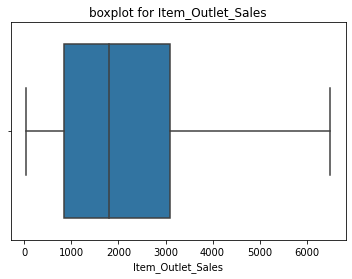

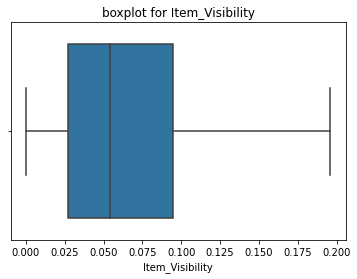

In [225]:
#Plotting the boxplots after replacing the outliers
plt.title('boxplot for Item_Outlet_Sales')
sns.boxplot(data_frame['Item_Outlet_Sales']);
plt.show()
plt.title('boxplot for Item_Visibility')
sns.boxplot(data_frame['Item_Visibility']);
plt.show()

There are no outliers after replacing them with upper limit

### Spliting the dataframe into Categorical and Numeircal

In [226]:
categorical_features=[]
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
    else:
        numerical_features.append(cols)

In [240]:
#Getting the categorical data frame
cat_data_frame=data_frame[categorical_features]
num_data_frame=data_frame[numerical_features]

In [241]:
cat_data_frame.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [242]:
cat_data_frame.shape

(8523, 7)

In [247]:
#Checking out the unique values in categorical features
for cols in categorical_features:
    print('{} has {} unique features'.format(cols,len(data_frame[cols].unique())))
    print(data_frame[cols].unique())
    print('-------------------------------------------------------------------------')

Item_Identifier has 1559 unique features
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
-------------------------------------------------------------------------
Item_Fat_Content has 5 unique features
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
-------------------------------------------------------------------------
Item_Type has 16 unique features
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
-------------------------------------------------------------------------
Outlet_Identifier has 10 unique features
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
-------------------------------------------------------------------------
Outlet_Size has 4 unique features
['Medium' nan 'High' 'Small']
-------------------------------------------------------------------------
Outlet_L

In [259]:
data_frame['Outlet_Type'].value_counts().index[0]

'Supermarket Type1'

In [262]:
#Unique value frequency in categorical feature
for cols in categorical_features:
    index_high=data_frame[cols].value_counts().index[0]
    freq_value_high=data_frame[cols].value_counts()[0]
    print('Max value count in {} is'.format(cols))
    print('{}: {}'.format(index,freq_value))
    index_low=data_frame[cols].value_counts(ascending=True).index[0]
    freq_value_low=data_frame[cols].value_counts(ascending=True)[0]
    print('Min value count in {} is'.format(cols))
    print('{}: {}'.format(index_low,freq_value_low))
    print('-----------------------------------------')

Max value count in Item_Identifier is
Supermarket Type1: 5577
Min value count in Item_Identifier is
FDC23: 1
-----------------------------------------
Max value count in Item_Fat_Content is
Supermarket Type1: 5577
Min value count in Item_Fat_Content is
low fat: 112
-----------------------------------------
Max value count in Item_Type is
Supermarket Type1: 5577
Min value count in Item_Type is
Seafood: 64
-----------------------------------------
Max value count in Outlet_Identifier is
Supermarket Type1: 5577
Min value count in Outlet_Identifier is
OUT019: 528
-----------------------------------------
Max value count in Outlet_Size is
Supermarket Type1: 5577
Min value count in Outlet_Size is
High: 932
-----------------------------------------
Max value count in Outlet_Location_Type is
Supermarket Type1: 5577
Min value count in Outlet_Location_Type is
Tier 1: 2388
-----------------------------------------
Max value count in Outlet_Type is
Supermarket Type1: 5577
Min value count in Outlet

### Finding the relationship between categorical features and target feature

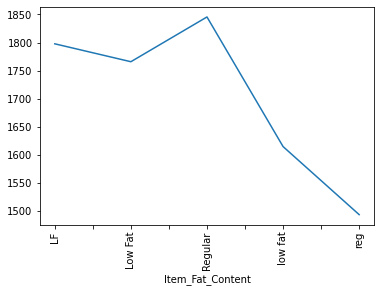

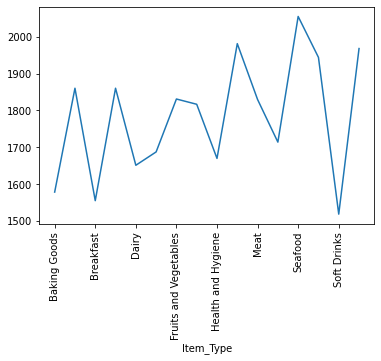

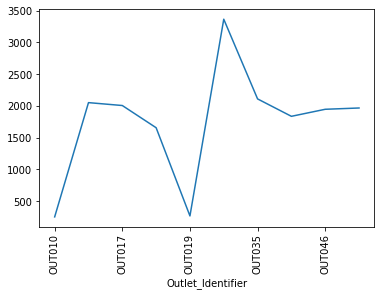

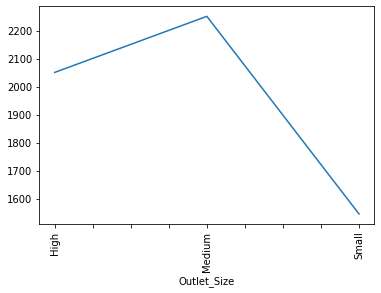

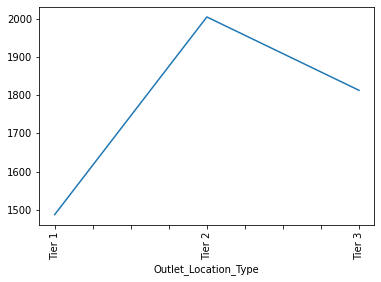

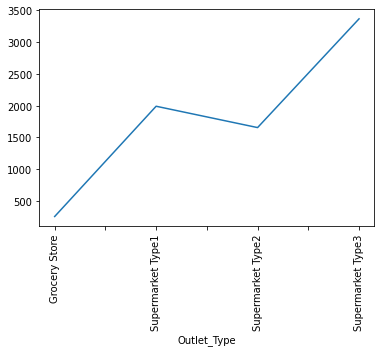

In [244]:
for cols in categorical_features:
    if len(data_frame[cols].unique())<=25:
        data_frame.groupby(cols)['Item_Outlet_Sales'].median().plot();
        plt.xticks(rotation=90)
        plt.show()

### Finding the relationship between numerical features and target feature.

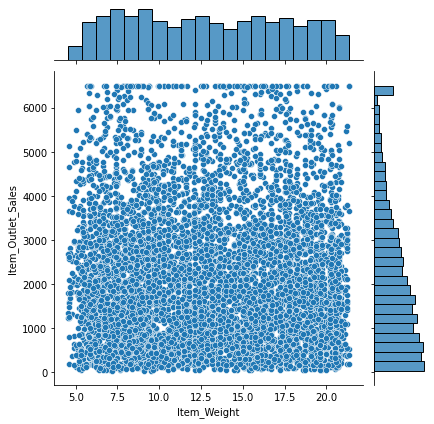

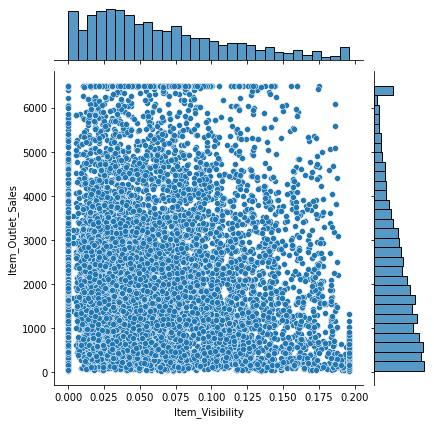

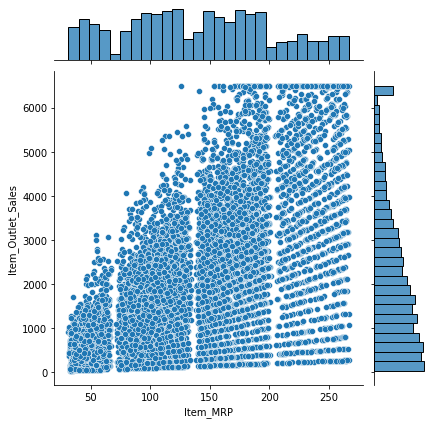

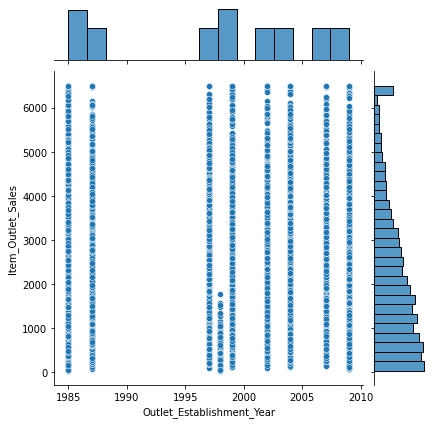

In [250]:
for cols in numerical_features:
    if cols!='Item_Outlet_Sales':
        sns.jointplot(data_frame[cols],data_frame['Item_Outlet_Sales']);
        plt.show()

In [266]:
#Finding the correlation for numerical data frame
data_frame.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013568,0.027141,-0.011588,0.014730
Item_Visibility,-0.013568,1.000000,-0.001163,-0.064105,-0.120418
Item_MRP,0.027141,-0.001163,1.000000,0.005020,0.574554
Outlet_Establishment_Year,-0.011588,-0.064105,0.005020,1.000000,-0.037133
Item_Outlet_Sales,0.014730,-0.120418,0.574554,-0.037133,1.000000


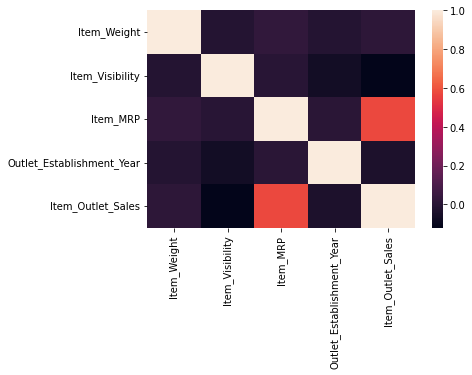

In [268]:
sns.heatmap(num_data_frame.corr());

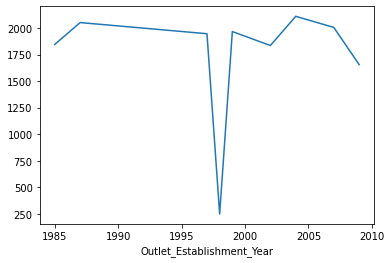

In [263]:
#Checking out the temporal features
data_frame.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot();